In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [17]:
import numpy as np
import pandas as pd

In [18]:
import datetime as dt
from dateutil.relativedelta import relativedelta as rd

In [41]:
# setting up default plotting parameters

%matplotlib inline
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})
sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#view latest date in table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [26]:
last_date = dt.date(2017,8,23)
print(last_date)

2017-08-23


In [27]:
year_before_last_date = dt.date(2017, 8, 23) - rd(months=+12)
print(year_before_last_date)

2016-08-23


In [39]:
precip_prior_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before_last_date, 
                                                                             Measurement.date <= last_date).all()

In [29]:

# Save the query results as a Pandas DataFrame and set the index to the date column
#load query results into pandas dataframe
precip_df = pd.DataFrame(precip_prior_year, columns =["date", "prcp"])
precip_df.set_index("date", inplace=True)
precip_df.index = pd.to_datetime(precip_df.index)

# Sort the dataframe by date
precip_df.sort_index
precip_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


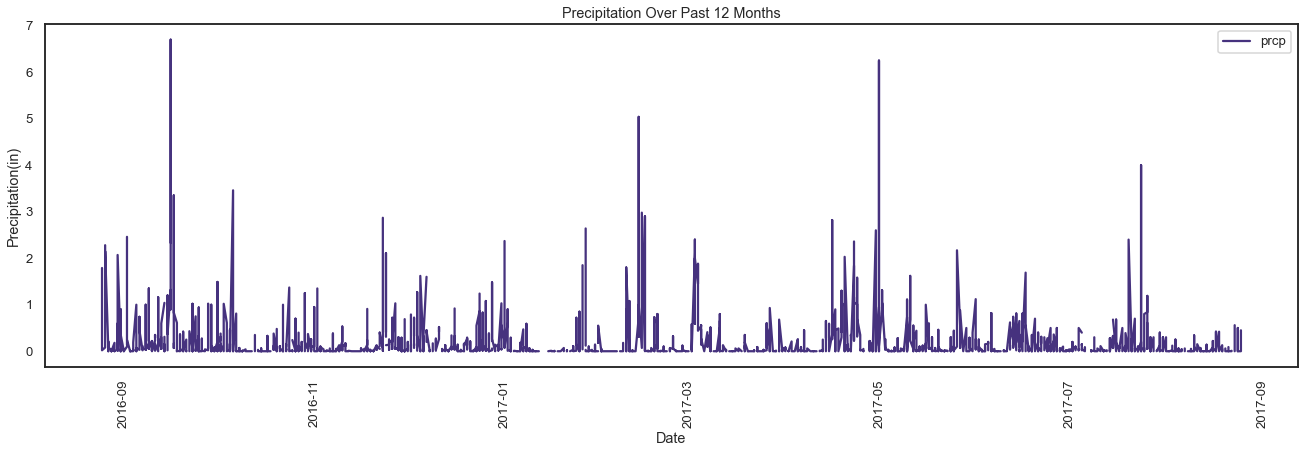

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot(kind="line", title="Precipitation Over Past 12 Months", rot="vertical")
precip_plot.set_ylabel("Precipitation(in)")
precip_plot.set_xlabel("Date")
plt.savefig("Images/12_month_precip")
plt.show()

In [31]:
#summary statistics
mean_precip = np.mean(precip_df["prcp"])
print(f"The mean precipitation is {mean_precip}")
var_precip = np.var(precip_df["prcp"])
print(f"The population variance is {var_precip}")
sd_precip = np.std(precip_df["prcp"])
print(f"The population standard deviation is {sd_precip}")
precip_df.describe()

The mean precipitation is 0.17727857496288996
The population variance is 0.2125905156666475
The population standard deviation is 0.4610753904370168


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [32]:
# Design a query to show how many stations are available in this dataset?
list_stations = session.query(Measurement.station).group_by(Measurement.station).all()
count_stations = session.query(func.count((Measurement.station).distinct())).all()
print(count_stations)
list_stations

[(9,)]


[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
station_tobs_detail = session.query(*sel).filter(Measurement.station == "USC00519281").all()
station_tobs_detail

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

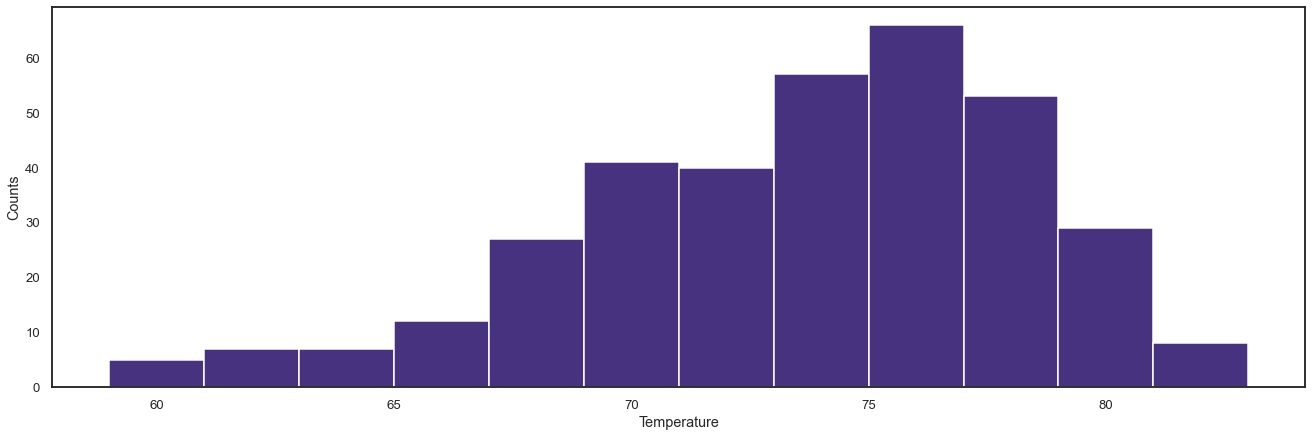

In [43]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281", 
                          Measurement.date >= year_before_last_date, 
                          Measurement.date <= last_date).all()

#storing query in dataframe
tobs_df = pd.DataFrame(station_tobs, columns =["tobs"])

plt.hist(tobs_df["tobs"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Counts")
plt.savefig("Images/tobs_hist")
plt.show()